<a href="https://colab.research.google.com/github/ahmedhussein2001/pro/blob/main/adv_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
pd.set_option('display.max_columns', None)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
df.shape

(129880, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


In [ ]:
df['Arrival Delay'].value_counts()

,count
Arrival Delay,
0.0,72753
1.0,2747
2.0,2587
3.0,2442
4.0,2373
...,...
1011.0,1
386.0,1
624.0,1


In [ ]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Arrival Delay'].mode())

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
customer_type,0
type_of_travel,0
class,0
flight_distance,0
departure_delay,0
arrival_delay,0
departure_and_arrival_time_convenience,0
ease_of_online_booking,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Departure Delay,129487.0,14.643385,37.932867,0.0,0.0,0.0,12.0,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.0,0.0,13.0,1584.0
Departure and Arrival Time Convenience,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online Booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Check-in Service,129487.0,3.306239,1.266146,0.0,3.0,3.0,4.0,5.0
Online Boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0
Gate Location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
On-board Service,129487.0,3.383204,1.287032,0.0,2.0,4.0,4.0,5.0


In [ ]:
# Visualization

In [ ]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['gender', 'age', 'customer_type', 'type_of_travel', 'class',
       'flight_distance', 'departure_delay', 'arrival_delay',
       'departure_and_arrival_time_convenience', 'ease_of_online_booking',
       'check-in_service', 'online_boarding', 'gate_location',
       'on-board_service', 'seat_comfort', 'leg_room_service', 'cleanliness',
       'food_and_drink', 'in-flight_service', 'in-flight_wifi_service',
       'in-flight_entertainment', 'baggage_handling', 'satisfaction'],
      dtype='object')

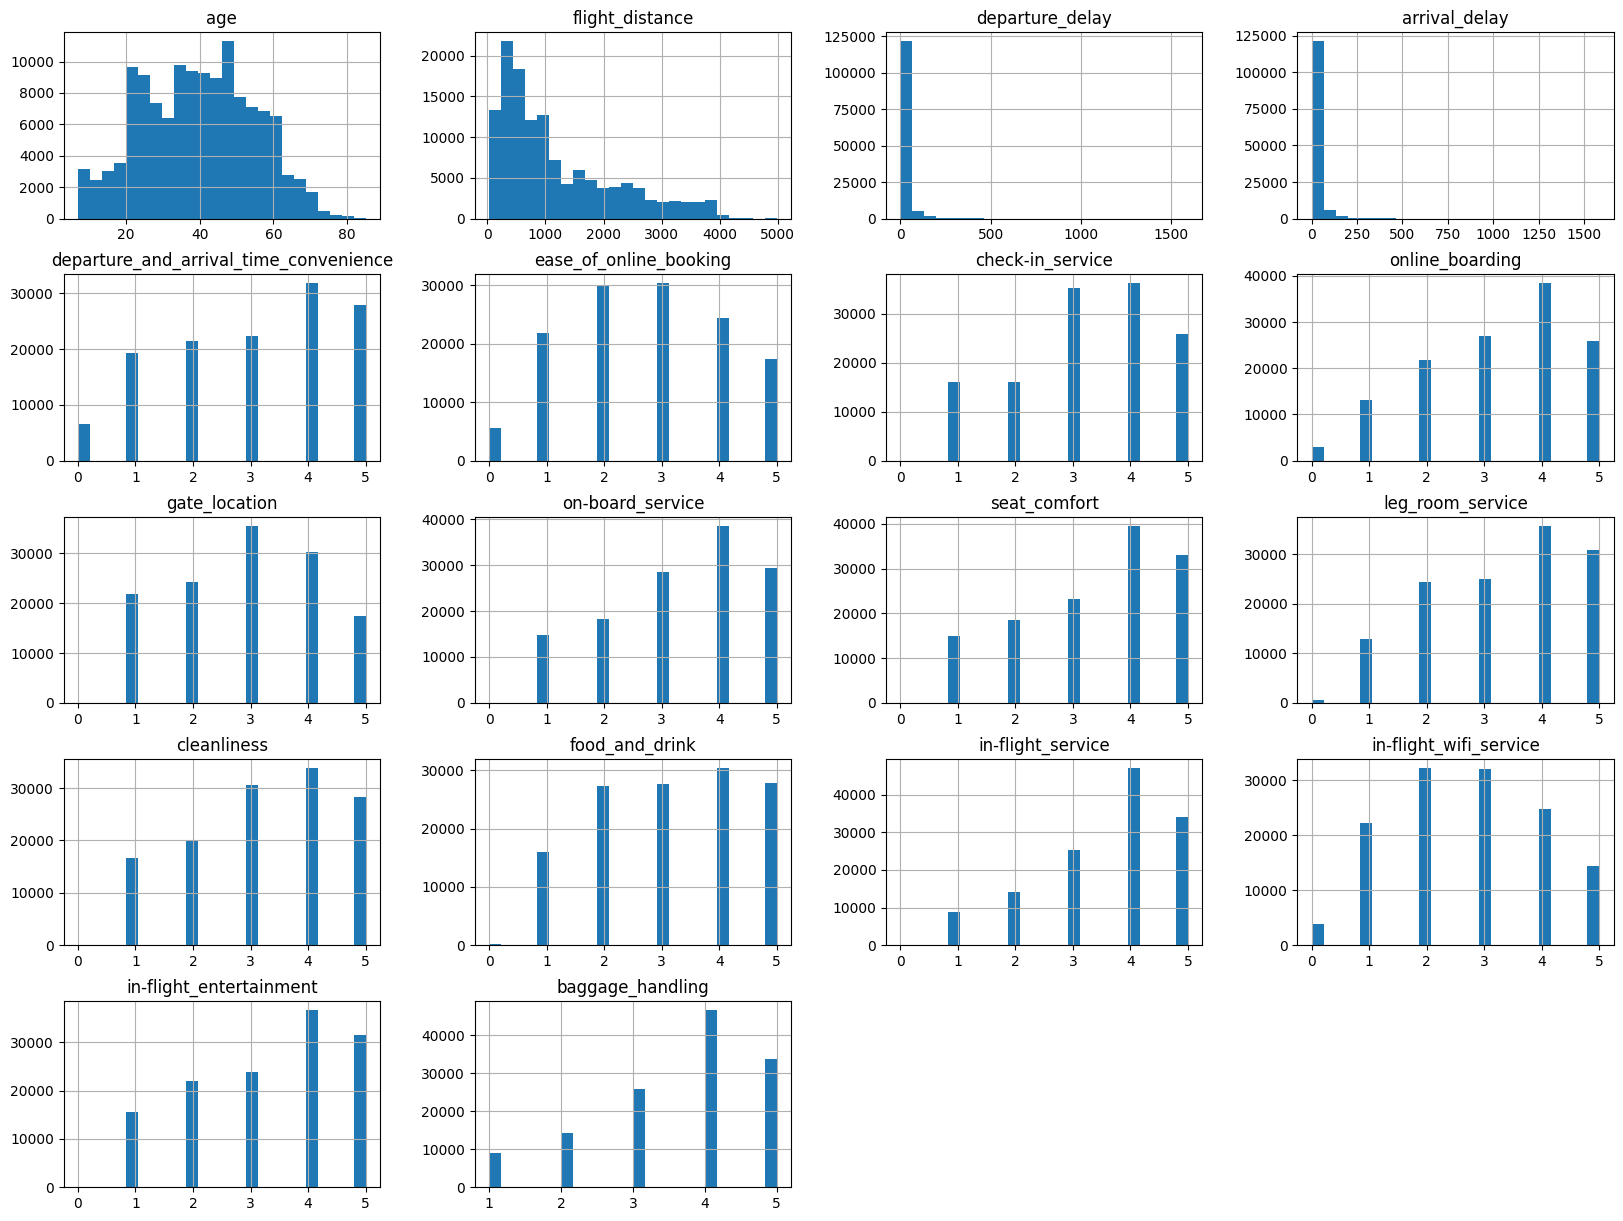

In [ ]:
df.hist(bins=24, figsize=(20,15))
plt.show()

<Axes: xlabel='age', ylabel='Count'>

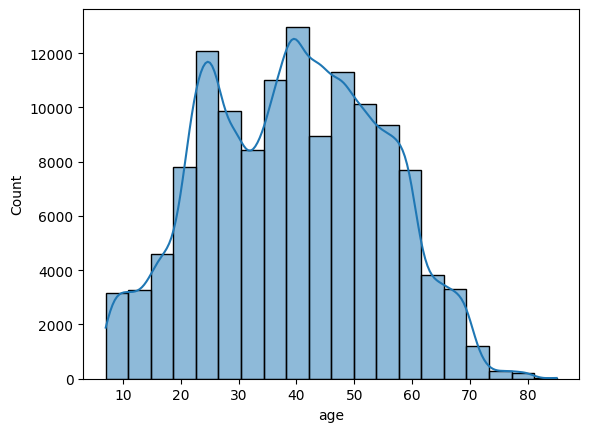

In [ ]:
sns.histplot(data=df , bins=20 ,kde = True ,  x="age")

In [ ]:
categorical = df.select_dtypes(include='object')
categorical.columns

Index(['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction'], dtype='object')

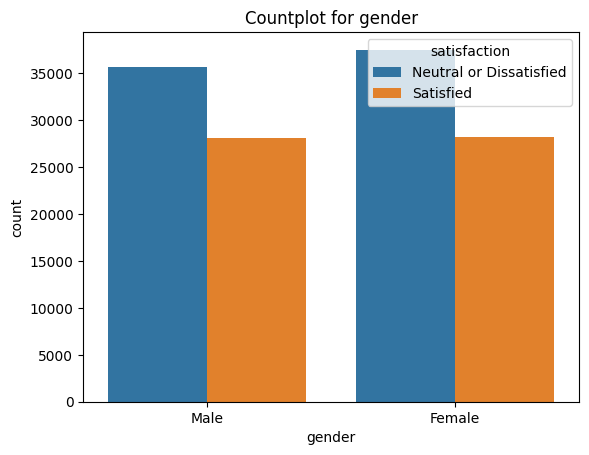

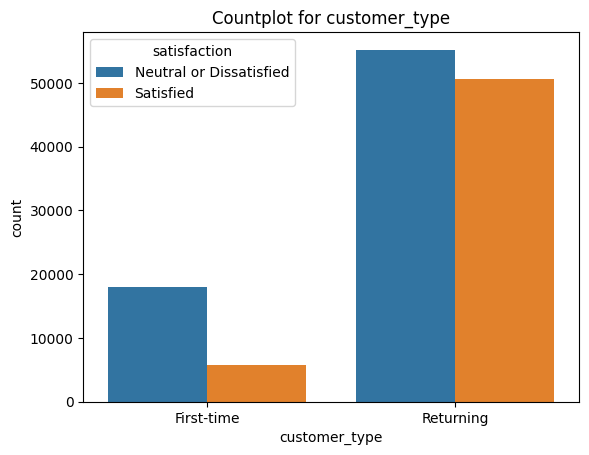

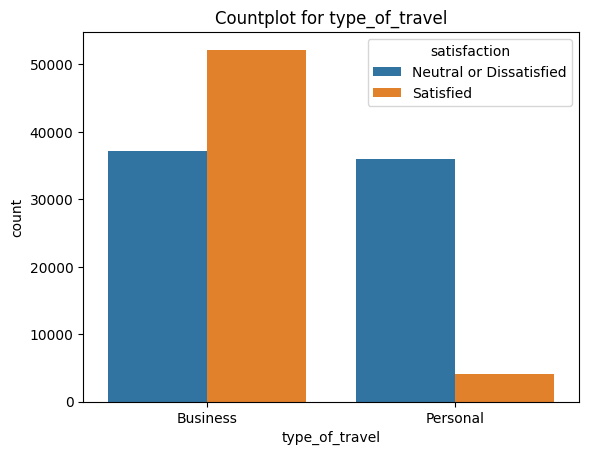

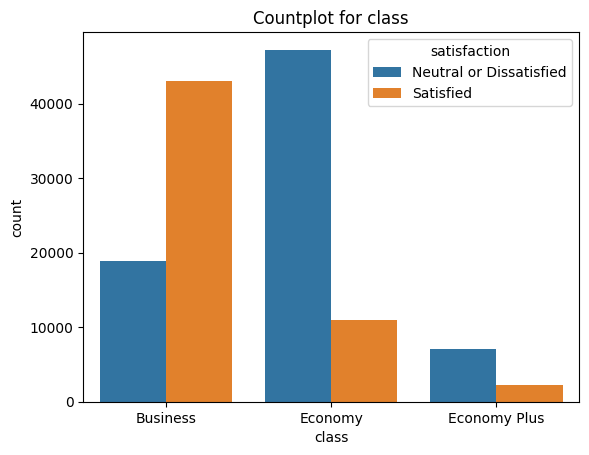

In [ ]:
for column in categorical.columns.drop('satisfaction'):
    sns.countplot(data=df, x=column , hue='satisfaction')
    plt.title(f'Countplot for {column}')
    plt.show() # Show each plot separately

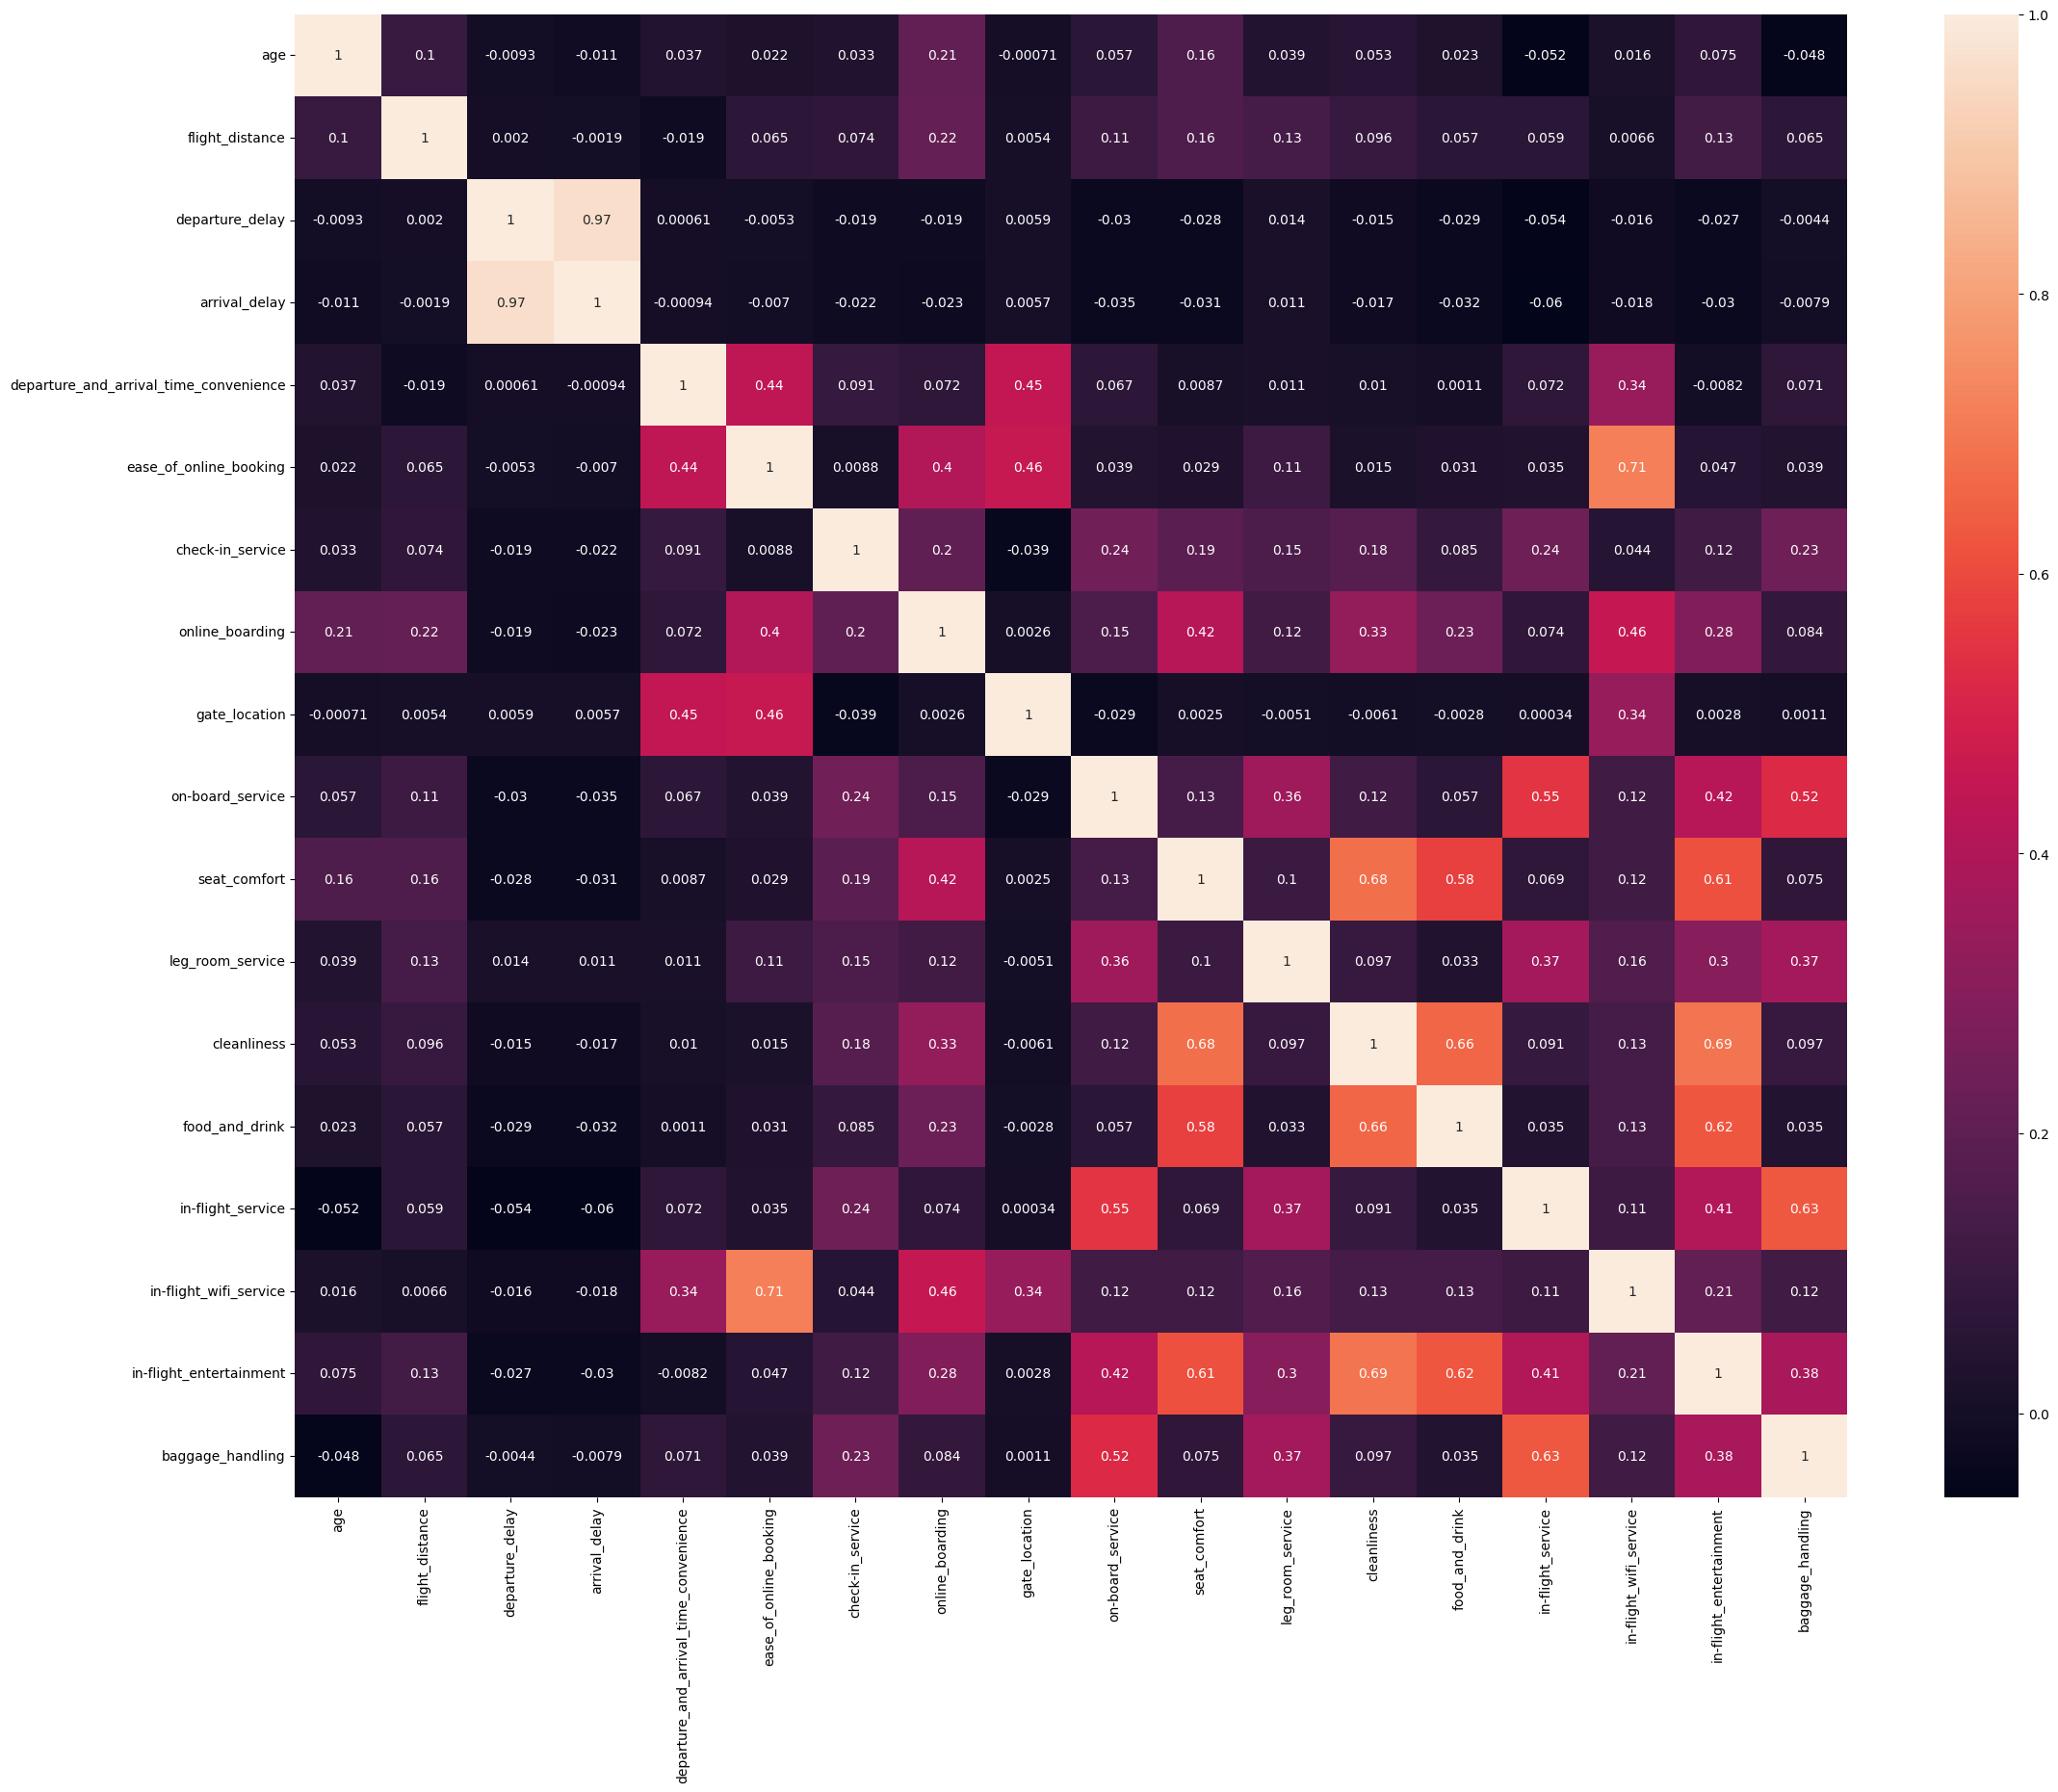

In [ ]:
# Calculate correlations only for numeric features
plt.figure(figsize=(26,20))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


In [ ]:
df['satisfaction'] = df['satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})
df = df.dropna(subset=['satisfaction'])
df

,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,ease_of_online_booking,check-in_service,online_boarding,gate_location,on-board_service,seat_comfort,leg_room_service,cleanliness,food_and_drink,in-flight_service,in-flight_wifi_service,in-flight_entertainment,baggage_handling,satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,0
129876,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,0
129877,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,0
129878,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   gender                                  129487 non-null  object 
 1   age                                     129487 non-null  int64  
 2   customer_type                           129487 non-null  object 
 3   type_of_travel                          129487 non-null  object 
 4   class                                   129487 non-null  object 
 5   flight_distance                         129487 non-null  int64  
 6   departure_delay                         129487 non-null  int64  
 7   arrival_delay                           129487 non-null  float64
 8   departure_and_arrival_time_convenience  129487 non-null  int64  
 9   ease_of_online_booking                  129487 non-null  int64  
 10  check-in_service                        129487 no

In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['customer_type'] = le.fit_transform(df['customer_type'])
df['type_of_travel'] = le.fit_transform(df['type_of_travel'])
df['class'] = le.fit_transform(df['class'])


In [ ]:
df

,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,ease_of_online_booking,check-in_service,online_boarding,gate_location,on-board_service,seat_comfort,leg_room_service,cleanliness,food_and_drink,in-flight_service,in-flight_wifi_service,in-flight_entertainment,baggage_handling,satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,2,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,0
129876,1,41,1,1,2,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,0
129877,1,42,1,1,2,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,0
129878,1,50,1,1,2,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,1


In [ ]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(103589, 22)

In [ ]:
model = LogisticRegression(max_iter=20000)  # Increase the max_iter value
model.fit(X_train, y_train)


LogisticRegression(max_iter=20000)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8722681288130357


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)

acc_decision_tree = accuracy_score(y_test , y_predict)
acc_decision_tree

0.9455942543825778

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
y_predict = knn.predict(X_test)

acc_knn = accuracy_score(y_test , y_predict)
acc_knn

0.7573557803691404

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[13241  1444]
 [ 1864  9349]]


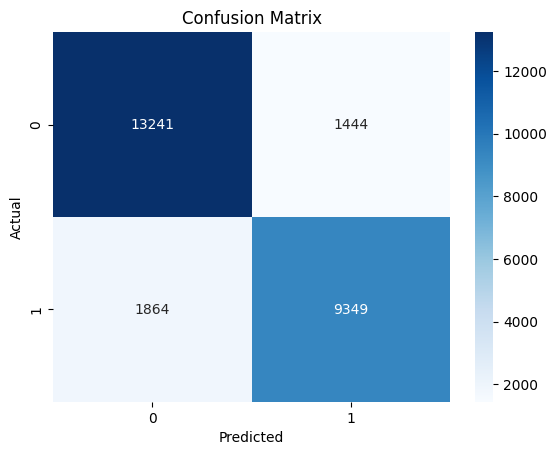

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

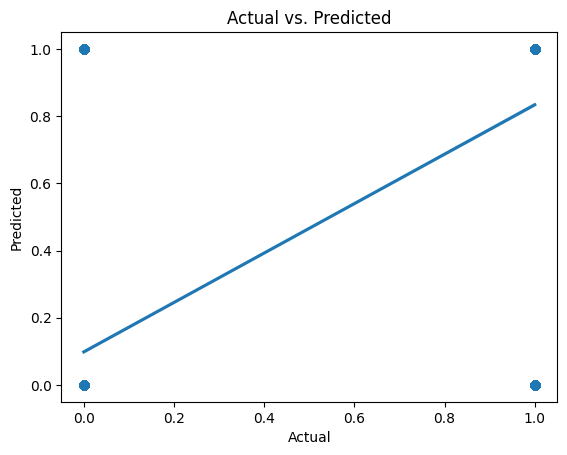

In [ ]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree'],
    'Score': [acc_knn, accuracy,  acc_decision_tree]})
models.sort_values(by='Score')

,Model,Score
0,Logistic Regression,0.872268
1,Decision Tree,0.945594
